# Wikipedia Album Info

In [1]:
import os
import re
from urllib.parse import urljoin
import datetime as dt

import sqlite3
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.display import display, HTML, clear_output

In [2]:
%run ./url_cache.ipynb
%run ./wikipedia_access.ipynb
%run ./wikipedia_album_detail_lib.ipynb

## Configure DB and Load Album Extract

In [3]:
db = sqlite3.Connection("var/data/music.db")

In [4]:
wayl_db = WikipediaAlbumYearListsDB(db)
albums = wayl_db.get_all()

## Look at Fields

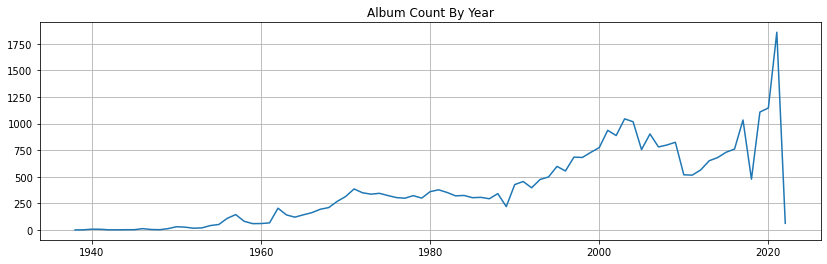

In [110]:
year_counts = albums.groupby('Year').size().reset_index().rename(columns={ 0: 'Count' })

plt.figure(figsize=(14, 4))
plt.title("Album Count By Year")
plt.plot(year_counts.Year, year_counts.Count)
plt.grid(1)
plt.show()

## Genres

In [40]:
def parse_genre(genre):
    if genre is None:
        return []
    genres = []
    for g in genre.split(","):
        g = g.strip().lower()
        if len(g) > 0:
            genres.append(g)
    genres.sort()
    return genres

In [112]:
albums['Genres'] = albums.Genre.apply(parse_genre)

In [118]:
genre_records = albums[['Year', 'Artist', 'Album', 'Genres']].explode('Genres')
genre_records = genre_records[genre_records.Genres.notnull()]

genre_counts = (genre_records
    .groupby('Genres')
    .size()
    .reset_index()
    .rename(columns={0: 'Count'})
    .sort_values(by='Count', ascending=False)
)

In [126]:
genre_counts.head(50)

,Genres,Count
29,alternative rock,894
350,indie rock,848
329,hip hop,846
472,pop,791
524,r&b,641
539,rock,511
160,country,396
316,hard rock,395
476,pop rock,352
348,indie pop,284


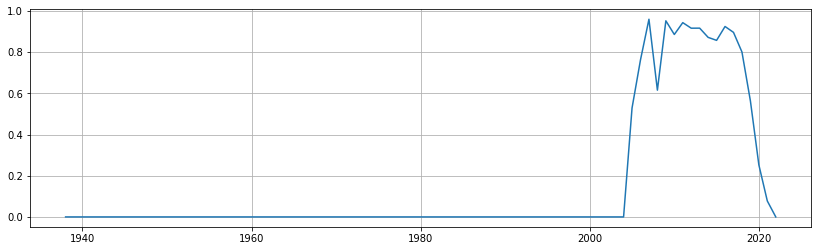

In [133]:
albums['HasGenre'] = albums.Genres.apply(len) > 0
has_genre = albums.groupby('Year').agg({'HasGenre': 'mean'}).reset_index()

plt.figure(figsize=(14, 4))
plt.plot(has_genre.Year, has_genre.HasGenre)
plt.grid(1)
plt.show()